# Testing scripts

This script is to test the functionality of data profiling.


In [79]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Find a way to recursively list all the files mathcing the csv file format.

In [80]:
path = "../rawdata"

data = pathlib.Path(path)

csv_files = list(data.rglob("*.csv*"))
csv_files

[PosixPath('../rawdata/eicu-crd-demo/2.0.1/diagnosis.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/vitalAperiodic.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/admissionDx.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/respiratoryCare.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/nurseAssessment.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/hospital.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/vitalPeriodic.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanGeneral.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/patient.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanGoal.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/treatment.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/apacheApsVar.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanEOL.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/infusiondrug.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanCareProvider.csv.gz'),
 PosixP

In [81]:
df = pd.read_csv(csv_files[0])
df.tail()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
24973,43897237,3158501,True,11,neurologic|altered mental status / pain|enceph...,"348.31, G93.41",Other
24974,44151864,3158501,True,11,hematology|white blood cell disorders|leukocyt...,"288.8, D72.829",Other
24975,44379558,3158501,True,11,pulmonary|disorders of acid base|respiratory a...,"276.2, E87.2",Other
24976,44000639,3158501,True,11,neurologic|altered mental status / pain|delirium,"293.0, F05",Other
24977,44496559,3173599,True,36,cardiovascular|chest pain / ASHD|acute coronar...,"410.90, I21.3",Primary


## % of null
this section is dedicated to test the percentage of null .

$$
\begin{align}
\%\,of\,missing\,values= \frac{num_{null}}{num_{rows}}\\
\end{align}
$$
where $num_{row}$ is the total number of row in this column, $num_{null}$ the number of missing values for that particular column



In [82]:
df.isnull().sum()

diagnosisid               0
patientunitstayid         0
activeupondischarge       0
diagnosisoffset           0
diagnosisstring           0
icd9code               3772
diagnosispriority         0
dtype: int64

Get the total number of rows for dataframe object, reference [here](https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)
- `len(df.index)`
- `df.shape[0]`
- `df[df.columns[0]].count()`

For max performance, they did a quick runtime
![](https://i.stack.imgur.com/wEzue.png)
Let's go with the first option

In [83]:
len(df.index)

24978

In [84]:
df.isnull().sum()/len(df.index)*100

diagnosisid             0.000000
patientunitstayid       0.000000
activeupondischarge     0.000000
diagnosisoffset         0.000000
diagnosisstring         0.000000
icd9code               15.101289
diagnosispriority       0.000000
dtype: float64

In [85]:
x = list(df.isnull().sum()/len(df.index)*100)
x

[0.0, 0.0, 0.0, 0.0, 0.0, 15.101289134438305, 0.0]

In [86]:
y = list(df.columns)
y

['diagnosisid',
 'patientunitstayid',
 'activeupondischarge',
 'diagnosisoffset',
 'diagnosisstring',
 'icd9code',
 'diagnosispriority']

Text(0.5, 0.98, '% of missing')

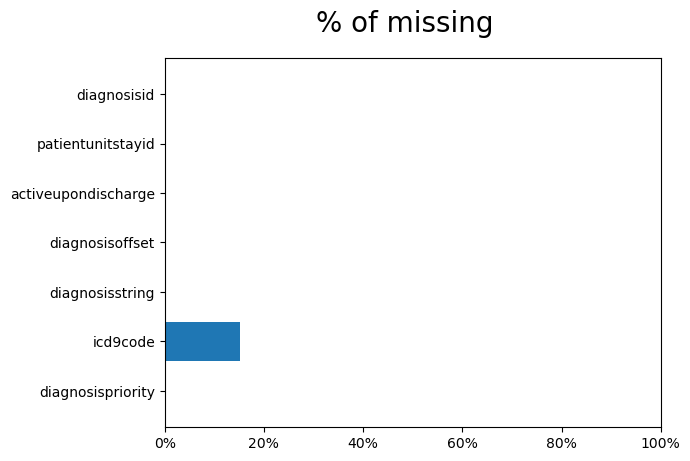

In [87]:
# added a plot for showing the percentage of missing values
fig,ax = plt.subplots()
ax.barh(y,x,align ='center')
ax.invert_yaxis()
ax.set_xlim((0,100))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle(r"% of missing",fontsize = 20)

## Uniquiness
This section is dedicated to test uniquesness from
$$
\begin{align}
Uniqueness = \frac{num_{dis}-1}{num_{non-missing}-1}
\end{align}
$$
where $num_{non-missing}$ is the number of non-missing values in that column



In [88]:
# number of distinct values
df.nunique()

diagnosisid            24978
patientunitstayid       2155
activeupondischarge        2
diagnosisoffset         2661
diagnosisstring         1091
icd9code                 500
diagnosispriority          3
dtype: int64

In [89]:
# number of non-missing values
len(df.index) - df.isnull().sum()

diagnosisid            24978
patientunitstayid      24978
activeupondischarge    24978
diagnosisoffset        24978
diagnosisstring        24978
icd9code               21206
diagnosispriority      24978
dtype: int64

In [90]:
uniqueness = (df.nunique() - 1)/(len(df.index) - df.isnull().sum() - 1) * 100
uniqueness

diagnosisid            100.000000
patientunitstayid        8.623934
activeupondischarge      0.004004
diagnosisoffset         10.649798
diagnosisstring          4.364015
icd9code                 2.353219
diagnosispriority        0.008007
dtype: float64

Text(0.5, 0.98, 'uniquiness')

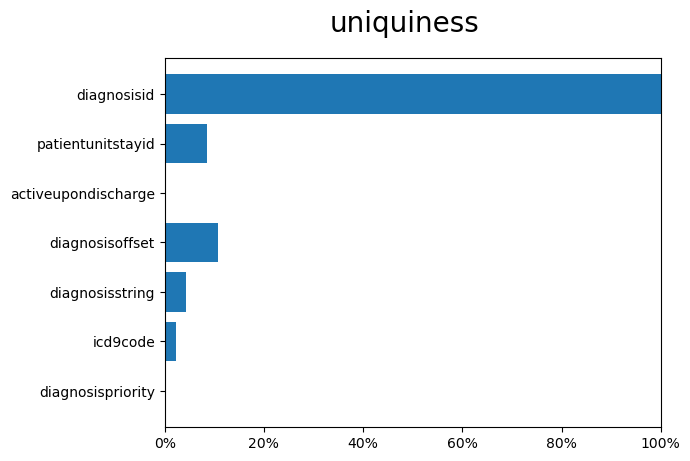

In [91]:
# added a plot for showing the percentage of trash
fig,ax = plt.subplots()
ax.barh(y,uniqueness,align ='center')
ax.invert_yaxis()
ax.set_xlim((0,100))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle(r"uniquiness",fontsize = 20)

## Pattern 
Couple of steps we need to implement here
- determine whether categorical or numerical
- if numerical, distribution
- if categorical, bla

In [92]:
df.head()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,7607199,346380,False,5028,cardiovascular|ventricular disorders|hypertension,"401.9, I10",Other
1,7570429,346380,False,685,neurologic|altered mental status / pain|change...,"780.09, R41.82",Major
2,7705483,346380,True,5035,cardiovascular|shock / hypotension|hypotension,"458.9, I95.9",Major
3,7848601,346380,True,5035,neurologic|altered mental status / pain|schizo...,"295.90, F20.9",Major
4,7451475,346380,False,5028,pulmonary|disorders of vasculature|pulmonary e...,"415.19, I26.99",Major


In [93]:
df.dtypes

diagnosisid             int64
patientunitstayid       int64
activeupondischarge      bool
diagnosisoffset         int64
diagnosisstring        object
icd9code               object
diagnosispriority      object
dtype: object

Some rule of thumbs are:
|data type|stat type|
|-|-|
|int64,float64|numerical|
|object|categorical|
|bool|categorical, but binary|

Then we need to design a function based on whether it's categorical or numerical

In [99]:

def get_num_cat_dtype(input_df):
    """
    return the 
    Args:
        input_df (pandas dataframe): dataframe you wish to determine 
        whether it's cateogircal or numerical

    Returns:
        numerical_col (list): 
        categorical_col (list): 
    Note:
        is implemented with mapping and hash faster when # of columns increase?
    """
    numerical_col = []
    categorical_col = []
    
    for col in input_df.columns:
        curr_type = input_df[col].dtype
        if curr_type == "object" or "bool":
            print(curr_type)
        
         
    
    # return numerical_col, categorical_col
    


get_num_cat_dtype(df)
    

int64
int64
bool
int64
object
object
object
